In [26]:
# Importacao das libraries
import pandas as pd
import functions as main
import numpy as np
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [25]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\ciclo4_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [38]:
df_model = opencsv.copy()
df_model

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,L1.TLT,L2.TLT,L1.BND,L2.BND,L1.Nr_Transactions,L2.Nr_Transactions,L1.Nr_Addresses,L2.Nr_Addresses,L1.BTC_Supply,L2.BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-15,9.139026,30.410139,21.174602,9.779839,0.077605,-4.676234,-4.754134,5.593589,5.382890,3.376032,...,4.995083,5.014775,4.351635,4.355653,12.687341,12.738388,13.416350,13.430809,16.726203,16.725475
2020-05-22,9.123773,30.348232,20.992740,9.787257,0.091019,-4.678709,-4.769927,5.625084,5.411108,3.410748,...,5.011594,4.995083,4.356225,4.351635,12.646396,12.687341,13.376241,13.416350,16.726681,16.726203
2020-05-29,9.151081,30.348232,21.225619,9.785835,0.102476,-4.678820,-4.781788,5.654698,5.427090,3.440293,...,5.004612,5.011594,4.359653,4.356225,12.538193,12.646396,13.344566,13.376241,16.726963,16.726681
2020-06-05,9.171810,30.250776,21.310001,9.793165,0.125563,-4.692723,-4.818735,5.702874,5.453854,3.510480,...,4.992701,5.004612,4.362729,4.359653,12.545968,12.538193,13.289593,13.344566,16.727262,16.726963
2020-06-12,9.155275,30.250776,20.897170,9.799387,0.121162,-4.670986,-4.792343,5.654337,5.437831,3.453400,...,4.947183,4.992701,4.357920,4.362729,12.697966,12.545968,13.374237,13.289593,16.727615,16.727262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,11.063775,32.061218,23.164405,9.952087,0.082719,-5.021463,-5.104561,6.252932,6.099582,3.909965,...,4.515239,4.544817,4.261747,4.273343,12.637543,12.964371,13.526932,13.482510,16.793859,16.793527
2024-03-29,11.119620,32.051391,22.926326,9.949970,0.076449,-5.020190,-5.096847,6.256494,6.094259,3.916676,...,4.526367,4.515239,4.269080,4.261747,12.735326,12.637543,13.428462,13.526932,16.794176,16.793859
2024-04-05,11.119620,32.051391,22.793648,9.958099,0.080386,-5.019212,-5.099467,6.247584,6.086254,3.903607,...,4.533154,4.526367,4.270182,4.269080,13.015715,12.735326,13.399046,13.428462,16.794501,16.794176


In [28]:
df_model.isnull().sum()

BTC_USD                  0
Mining_Difficulty        0
USD_OnChain_Volume       0
M2_Liquidity             0
EUR_USD                  0
JPY_USD                  0
JPY_EUR                  0
SPY                      0
QQQ                      0
EXSA                     0
JPXN                     0
IWDA                     0
GLD                      0
SLV                      0
TLT                      0
BND                      0
Nr_Transactions          0
Nr_Addresses             0
BTC_Supply               0
L1.BTC_USD               0
L2.BTC_USD               0
L1.Mining_Difficulty     0
L2.Mining_Difficulty     0
L1.USD_OnChain_Volume    0
L2.USD_OnChain_Volume    0
L1.M2_Liquidity          0
L2.M2_Liquidity          0
L1.EUR_USD               0
L2.EUR_USD               0
L1.JPY_USD               0
L2.JPY_USD               0
L1.JPY_EUR               0
L2.JPY_EUR               0
L1.SPY                   0
L2.SPY                   0
L1.QQQ                   0
L2.QQQ                   0
L

## Matriz de Correlacoes


In [29]:
test_corr = df_model.copy()
test_corr = test_corr.iloc[:, :18] # apenas as variaveis originais
test_corr.shape

(206, 18)

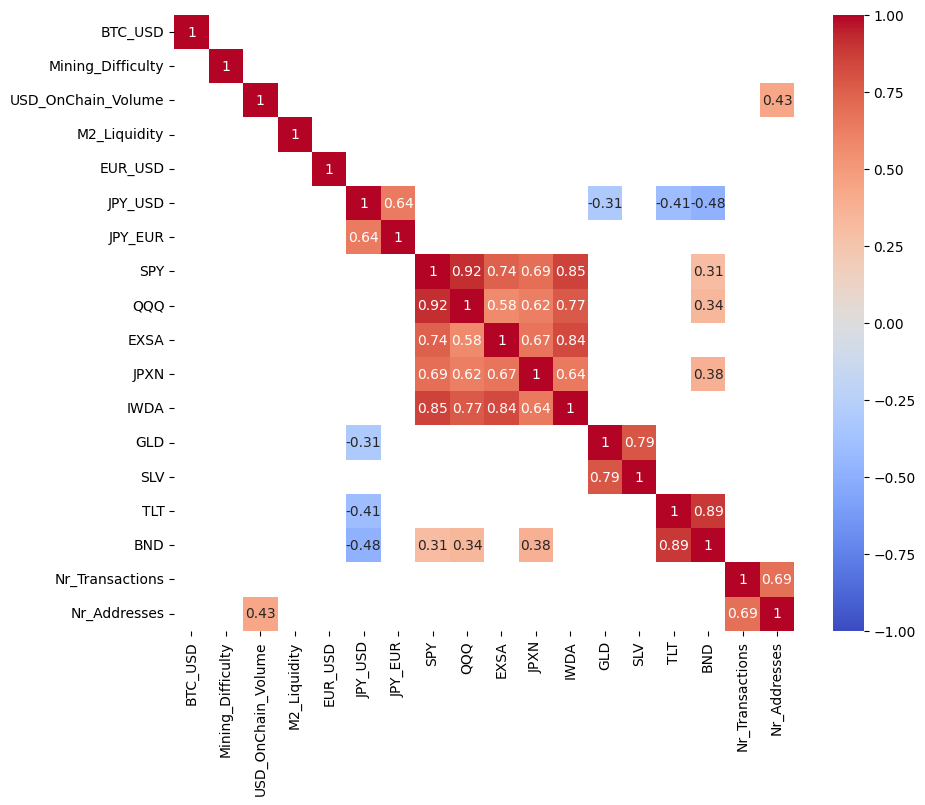

In [30]:
main.correlation_map(df=test_corr, threshold=0.3)

## Seleção de Variáveis

Considerar técnicas como regressão lasso, ridge ou elastic net, que fazem seleção de variáveis automaticamente, pode ser útil se você suspeitar que nem todas as 20 variáveis são relevantes.

In [37]:
df_model.columns

Index(['BTC_USD', 'Mining_Difficulty', 'USD_OnChain_Volume', 'M2_Liquidity',
       'EUR_USD', 'JPY_USD', 'JPY_EUR', 'SPY', 'QQQ', 'EXSA', 'JPXN', 'IWDA',
       'GLD', 'SLV', 'TLT', 'BND', 'Nr_Transactions', 'Nr_Addresses',
       'BTC_Supply', 'L1.BTC_USD', 'L2.BTC_USD', 'L1.Mining_Difficulty',
       'L2.Mining_Difficulty', 'L1.USD_OnChain_Volume',
       'L2.USD_OnChain_Volume', 'L1.M2_Liquidity', 'L2.M2_Liquidity',
       'L1.EUR_USD', 'L2.EUR_USD', 'L1.JPY_USD', 'L2.JPY_USD', 'L1.JPY_EUR',
       'L2.JPY_EUR', 'L1.SPY', 'L2.SPY', 'L1.QQQ', 'L2.QQQ', 'L1.EXSA',
       'L2.EXSA', 'L1.JPXN', 'L2.JPXN', 'L1.IWDA', 'L2.IWDA', 'L1.GLD',
       'L2.GLD', 'L1.SLV', 'L2.SLV', 'L1.TLT', 'L2.TLT', 'L1.BND', 'L2.BND',
       'L1.Nr_Transactions', 'L2.Nr_Transactions', 'L1.Nr_Addresses',
       'L2.Nr_Addresses', 'L1.BTC_Supply', 'L2.BTC_Supply'],
      dtype='object')

## Teste de Multicolinearidade


Como você tem muitas variáveis, é importante verificar a multicolinearidade, especialmente porque as variáveis acumuladas podem estar altamente correlacionadas entre si. Testes como o VIF (Variance Inflation Factor) podem ajudar a identificar problemas.

Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship with each other. This can pose a problem in many cases as you would normally want your independent variables to be… independent.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

model1_list = ["Mining_Difficulty", "GLD", "USD_OnChain_Volume"]

# the full independent variables set
X = df_model[model1_list]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

#       Interpreting the VIF Values:
#       VIF < 5: Generally considered acceptable, indicating low to moderate multicollinearity.
#       VIF between 5 and 10: Indicates moderate to high multicollinearity, which may be problematic, but not necessarily requiring immediate removal.
#       VIF > 10: Strong multicollinearity, typically suggesting that the variable should be considered for removal or that further investigation is needed.

,feature,VIF
0,Mining_Difficulty,5736.888844
1,GLD,6134.036487
2,USD_OnChain_Volume,1646.961154


we also construct
variables capturing the number of new members
(new members) and new posts on online BitCoin
forums (new posts) extracted from bitcointalk.org.

The size of the BitCoin economy (number of transactions and number of addresses) has
always a positive and statistically significant impact
on BitCoin price

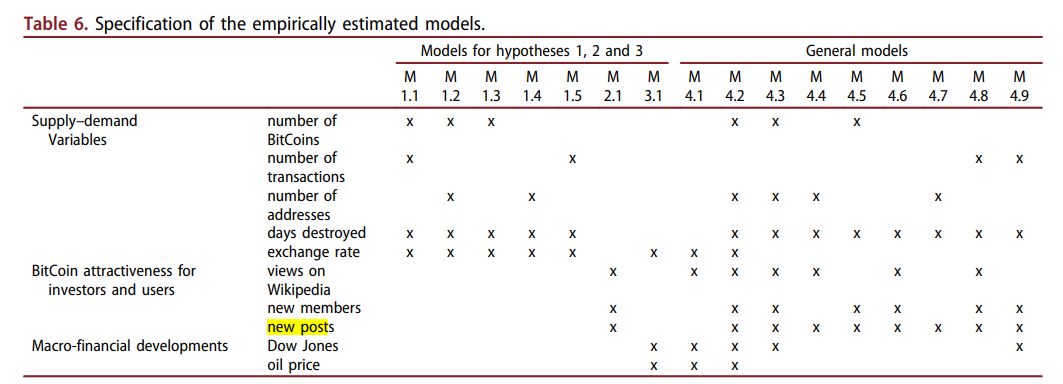

## Regressao Linear Multipla

In [28]:
# Yt = b0 + b1X1t + b2X2t + εt

X = model1_df
y = full_sample["BTC_USD"]

X = sm.add_constant(X) # Add a constant term to the predictors

fit = sm.OLS(y, X).fit() # Fit the OLS model

print(fit.summary()) # Print the summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                BTC_USD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6178
Date:                Sat, 17 Aug 2024   Prob (F-statistic):              0.716
Time:                        19:38:26   Log-Likelihood:                 2006.7
No. Observations:                 729   AIC:                            -3999.
Df Residuals:                     722   BIC:                            -3967.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

### Homocesdasticity

In [ ]:
import statsmodels.formula.api as smf

# https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/

### Normality of Residuals

Assumption: The residuals should be approximately normally distributed.

Test:
Q-Q Plot: Compare the quantiles of residuals to a normal distribution. If residuals are normal, the points will lie approximately on the 45-degree line.

Shapiro-Wilk Test or Kolmogorov-Smirnov Test: Statistical tests for normality of residuals.

Transformation: If residuals are not normally distributed, consider transforming the dependent variable or using robust regression methods.

### Independence of Errors


Assumption: The residuals (errors) should be independent of each other.

Test:

Durbin-Watson Test: Detects the presence of autocorrelation in residuals, especially in time series data.

Plot Residuals vs. Time: For time series data, plot residuals against time to detect patterns or autocorrelation.

Transformation:
Add Lagged Variables: For time series, include lagged values of the dependent variable as predictors.

### No Omitted Variable Bias

Assumption: All relevant independent variables are included in the model.

Test:

Ramsey RESET Test: Checks for omitted variables by testing for non-linearity in the model.

Remedies:

Include Relevant Variables: Ensure all theoretically important variables are included in the model.
Use Model Selection Criteria: Such as AIC or BIC to guide variable selection.